<a href="https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/precip_biomass_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Visualizing bivariate relationships](https://campus.datacamp.com/courses/correlation-and-regression/visualizing-two-variables?ex=1)

In [0]:
library(dplyr)

In [0]:
library(ggplot2)

In [0]:
data = read.csv("https://drive.google.com/uc?id=1LX1iFFkKi4V9YjFVMsansk4-i3rSrqbv")

In [0]:
tail(data)

,year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2076,2018,471,Riparian,22.47667,fall,2018 Q4,7.381667,5.138333,46.70214,-114.0425
2077,2018,480,Riparian,27.44000,fall,2018 Q4,7.381667,5.138333,46.71092,-114.0417
2078,2018,481,Riparian,9.56000,fall,2018 Q4,7.381667,5.138333,46.70958,-114.0447
2079,2018,482,Riparian,0.00000,fall,2018 Q4,7.381667,5.138333,46.70839,-114.0406
2080,2018,484,Riparian,13.00667,fall,2018 Q4,7.381667,5.138333,46.70708,-114.0436
2081,2018,571,Active,12.40000,fall,2018 Q4,7.381667,5.138333,46.71035,-114.0388


## Box Plot

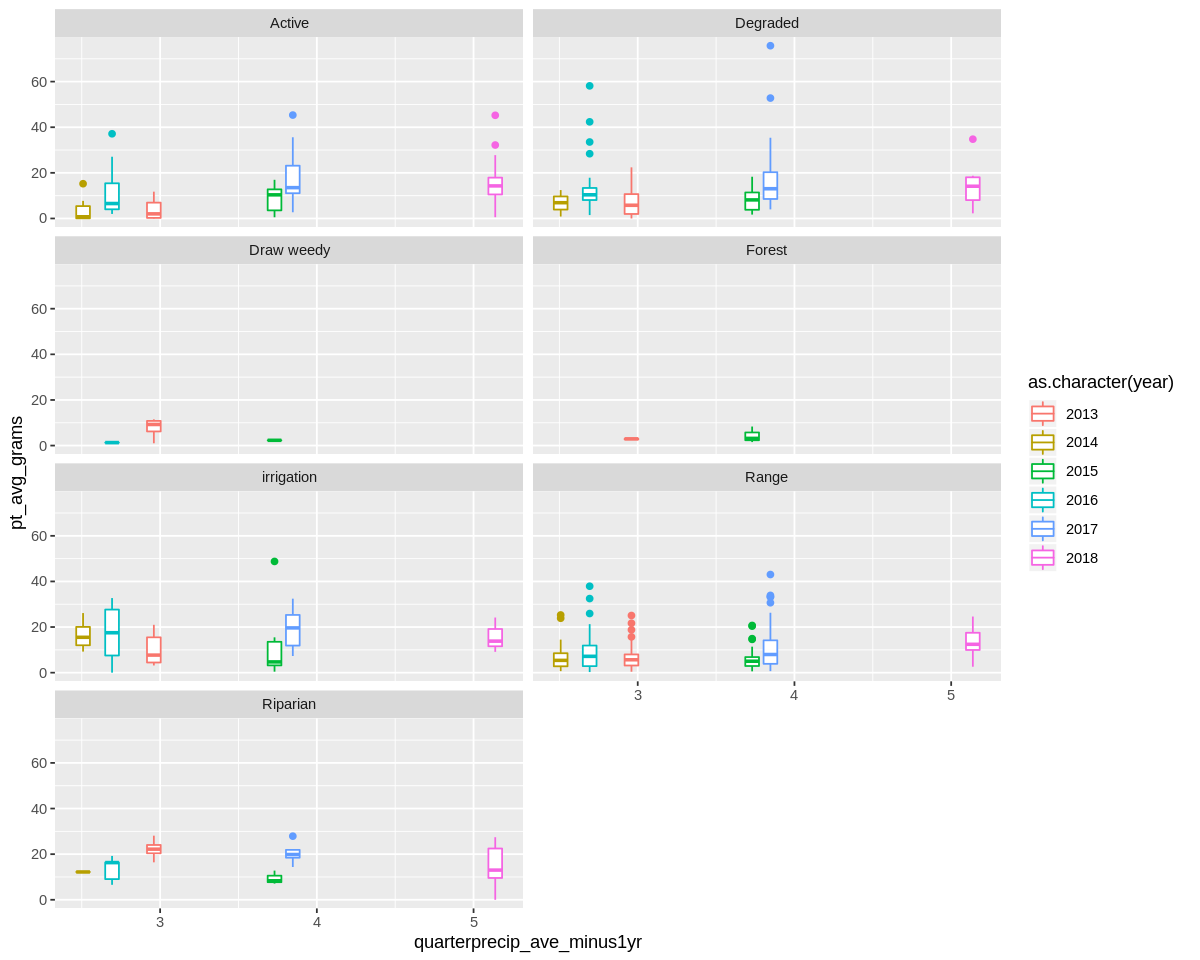

In [0]:
# All points

options(repr.plot.width=10, repr.plot.height=8)

# subset(data, !is.na(pt_avg_grams) & year > 2012) %>%
#   ggplot(height = 250, aes(x = cut(quarterprecip_ave_minus1yr, breaks = 6), y = pt_avg_grams, group = year, color = as.character(year))) +
#   geom_boxplot() +
#   facet_wrap(. ~ type, ncol = 2)

subset(data, !is.na(pt_avg_grams) & year > 2012) %>%
  ggplot(height = 250, aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, group = year, color = as.character(year))) +
  geom_boxplot() +
  facet_wrap(. ~ type, ncol = 2)

In [0]:
?geom_boxplot

## Range by Year

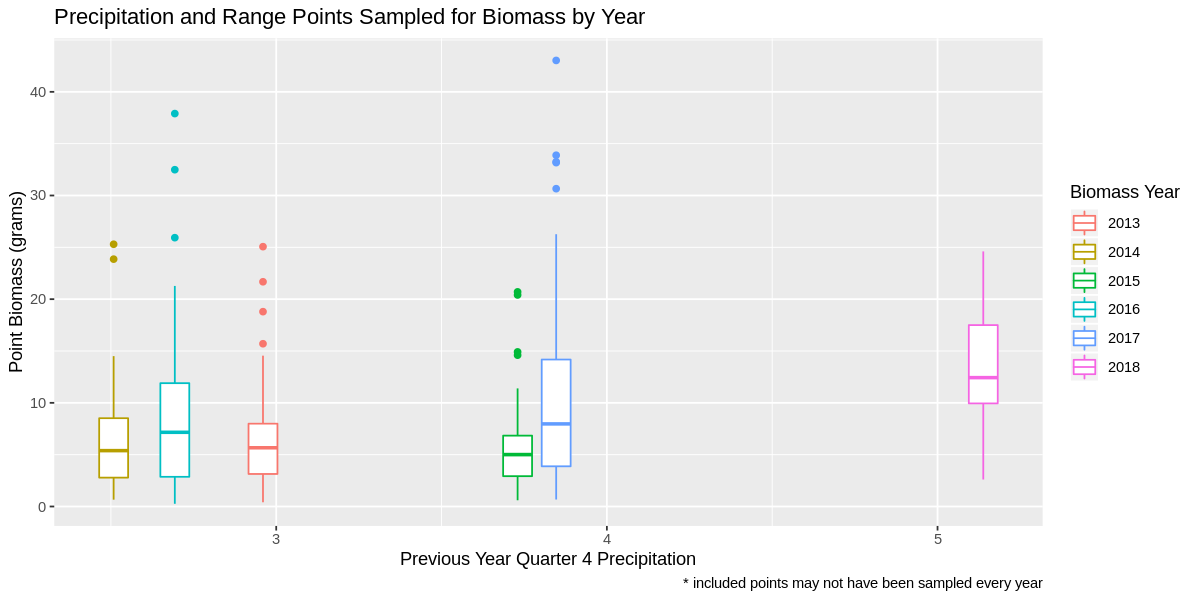

In [0]:
options(repr.plot.width=10, repr.plot.height=5)

subset(data, !is.na(pt_avg_grams) & year >= 2013) %>% 
  filter(type == "Range") %>%
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot() +
  labs(x = "Previous Year Quarter 4 Precipitation", y = "Point Biomass (grams)", colour = "Biomass Year", title = "Precipitation and Range Points Sampled for Biomass by Year",
      caption = "* included points may not have been sampled every year")

In [0]:
df %>%
  filter(type == "Range") %>%
  summary()

      year          gridpt              type      pt_avg_grams     season   
 Min.   :2010   Min.   :  2.0   Active    :  0   Min.   : 0.000   fall:997  
 1st Qu.:2011   1st Qu.: 46.0   Degraded  :  0   1st Qu.: 3.160             
 Median :2013   Median :144.0   Draw weedy:  0   Median : 5.863             
 Mean   :2013   Mean   :162.4   Forest    :  0   Mean   : 7.750             
 3rd Qu.:2015   3rd Qu.:267.0   irrigation:  0   3rd Qu.: 9.908             
 Max.   :2018   Max.   :574.0   Range     :997   Max.   :86.272             
                                Riparian  :  0   NA's   :524                
    quarter    quarterprecip_ave quarterprecip_ave_minus1yr      lat       
 2012 Q4:146   Min.   :2.508     Min.   :2.508              Min.   :46.67  
 2013 Q4:146   1st Qu.:2.693     1st Qu.:2.508              1st Qu.:46.69  
 2014 Q4:146   Median :2.960     Median :2.960              Median :46.70  
 2015 Q4:146   Mean   :3.238     Mean   :3.108              Mean   :46.70  
 201

In [0]:
head(data, 4)

Warning message:
“Removed 580 rows containing missing values (geom_point).”

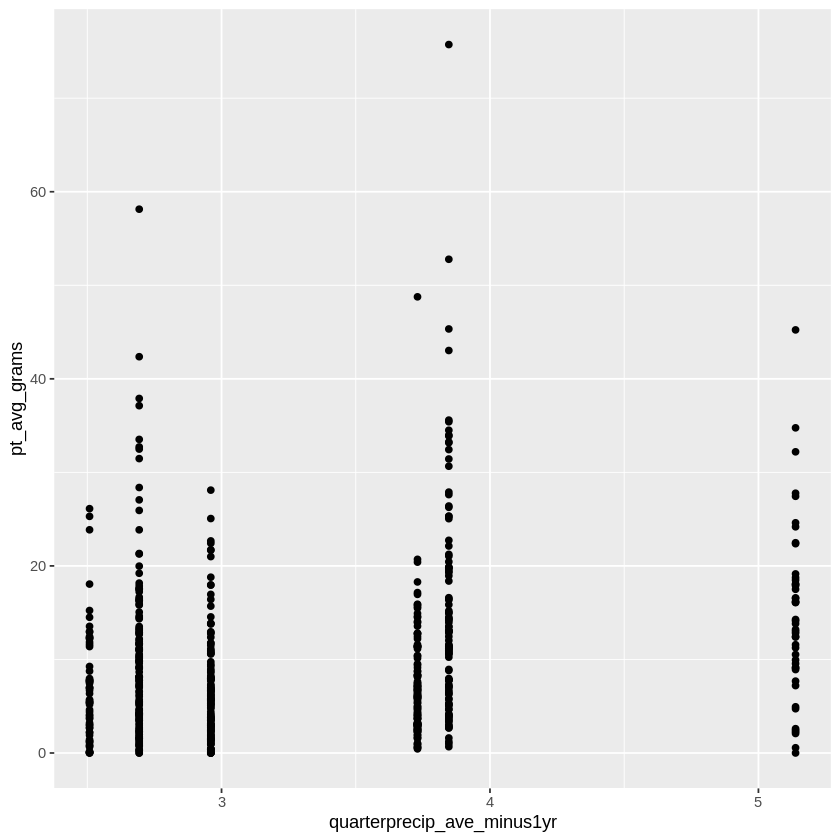

In [0]:
ggplot(data = data, aes(y = pt_avg_grams, x = quarterprecip_ave_minus1yr)) +
  geom_point()

In [0]:
# average type and compare with biomass
range <- filter(data, type == 'Range' & !is.na())

In [0]:
head(range)

year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2013,2,Range,6.176667,fall,2013 Q4,2.508333,2.96,46.72972,-114.0010
2013,3,Range,21.676667,fall,2013 Q4,2.508333,2.96,46.72443,-114.0227
2013,4,Range,8.030000,fall,2013 Q4,2.508333,2.96,46.72487,-114.0195
2013,5,Range,NA,fall,2013 Q4,2.508333,2.96,46.72531,-114.0164
2013,6,Range,NA,fall,2013 Q4,2.508333,2.96,46.72575,-114.0132
2013,7,Range,14.550000,fall,2013 Q4,2.508333,2.96,46.72707,-114.0036


In [0]:
rowMeans(range$pt_avg_grams)

ERROR: ignored

In [0]:
str(df)

'data.frame':	2081 obs. of  10 variables:
 $ year                      : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ gridpt                    : int  2 3 4 5 6 7 8 9 10 11 ...
 $ type                      : Factor w/ 7 levels "Active","Degraded",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ pt_avg_grams              : num  NA 7.3 1.51 7.43 3.92 ...
 $ season                    : Factor w/ 1 level "fall": 1 1 1 1 1 1 1 1 1 1 ...
 $ quarter                   : Factor w/ 7 levels "2012 Q4","2013 Q4",..: NA NA NA NA NA NA NA NA NA NA ...
 $ quarterprecip_ave         : num  NA NA NA NA NA NA NA NA NA NA ...
 $ quarterprecip_ave_minus1yr: num  NA NA NA NA NA NA NA NA NA NA ...
 $ lat                       : num  46.7 46.7 46.7 46.7 46.7 ...
 $ long                      : num  -114 -114 -114 -114 -114 ...


In [0]:
r <- df %>% filter(type == "Range" & !is.na(pt_avg_grams))
x <- split(r$gridpt, r$year)
y <- Reduce(intersect, x)

In [0]:
pts <- df[df$gridpt %in% y,]

In [0]:
pts

,year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
157,2010,199,Range,1.675000,fall,NA,NA,NA,46.68694,-114.0285
181,2010,240,Range,86.272500,fall,NA,NA,NA,46.68120,-114.0368
455,2011,199,Range,5.253333,fall,NA,NA,NA,46.68694,-114.0285
479,2011,240,Range,14.026667,fall,NA,NA,NA,46.68120,-114.0368
753,2012,199,Range,4.593333,fall,2012 Q4,2.960000,NA,46.68694,-114.0285
777,2012,240,Range,6.056667,fall,2012 Q4,2.960000,NA,46.68120,-114.0368
1051,2013,199,Range,2.710000,fall,2013 Q4,2.508333,2.960000,46.68694,-114.0285
1075,2013,240,Range,3.583333,fall,2013 Q4,2.508333,2.960000,46.68120,-114.0368
1349,2014,199,Range,12.330000,fall,2014 Q4,3.730000,2.508333,46.68694,-114.0285


Warning message:
“Removed 6 rows containing missing values (geom_point).”

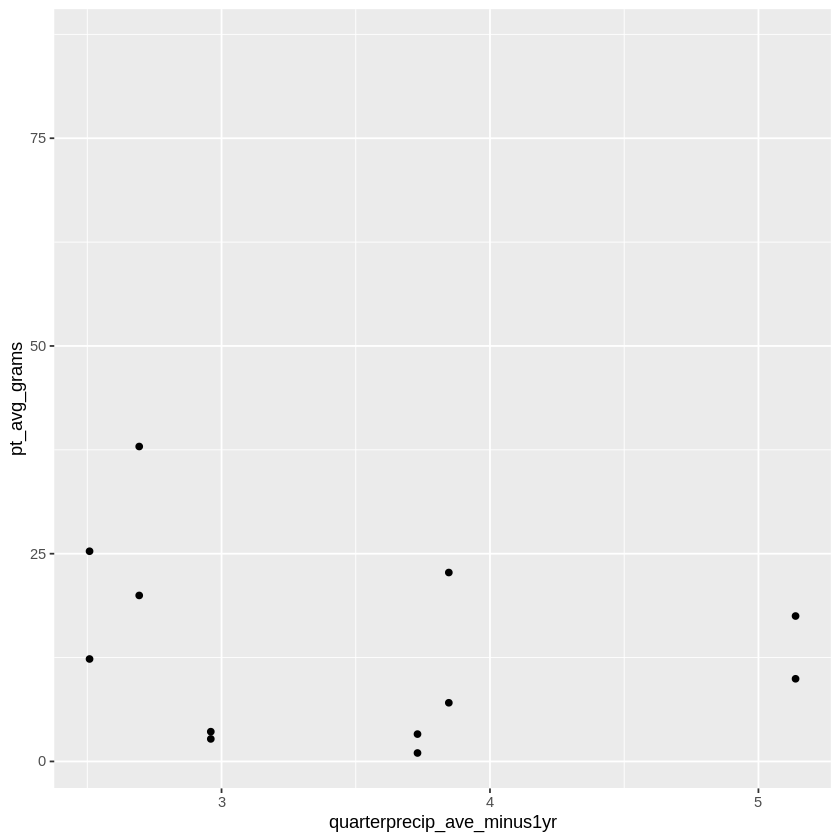

In [0]:
pts %>% 
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams)) + 
  geom_point()

# Correlation
* [Compute Properties](https://campus.datacamp.com/courses/correlation-and-regression/correlation?ex=6)

In [0]:
head(df, 2)

year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2010,2,Range,NA,fall,NA,NA,NA,46.72972,-114.0010
2010,3,Range,7.305,fall,NA,NA,NA,46.72443,-114.0227


In [0]:
# remove gridpt NAs
df <- df[complete.cases(df[ , 4]), ]

In [0]:
df %>%
  group_by(year, type) %>%
  summarize(
    N = n(),
    mean_of_pt_avg = mean(pt_avg_grams),
    std_dev_of_pt_avg = sd(pt_avg_grams),
    x = mean(quarterprecip_ave_minus1yr)
#    correlation_between_pt_and_precip = cor(pt_avg_grams, quarterprecip_ave_minus1yr)
  )

In [0]:
df %>%
  

### Find subset of points for range recorded every year

In [0]:
glimpse(data)

Observations: 2,081
Variables: 10
$ year                       <int> 2010, 2010, 2010, 2010, 2010, 2010, 2010, …
$ gridpt                     <int> 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ type                       <fct> Range, Range, Range, Range, Range, Range, …
$ pt_avg_grams               <dbl> NA, 7.3050, 1.5125, 7.4350, 3.9150, 3.1950…
$ season                     <fct> fall, fall, fall, fall, fall, fall, fall, …
$ quarter                    <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ quarterprecip_ave          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ quarterprecip_ave_minus1yr <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ lat                        <dbl> 46.72972, 46.72443, 46.72487, 46.72531, 46…
$ long                       <dbl> -114.0010, -114.0227, -114.0195, -114.0164…


In [0]:
head(data)

year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2010,2,Range,NA,fall,NA,NA,NA,46.72972,-114.0010
2010,3,Range,7.3050,fall,NA,NA,NA,46.72443,-114.0227
2010,4,Range,1.5125,fall,NA,NA,NA,46.72487,-114.0195
2010,5,Range,7.4350,fall,NA,NA,NA,46.72531,-114.0164
2010,6,Range,3.9150,fall,NA,NA,NA,46.72575,-114.0132
2010,7,Range,3.1950,fall,NA,NA,NA,46.72707,-114.0036


In [0]:
# remove NAs
# df <- 
df <- subset(data, !is.na(pt_avg_grams))
# find points recorded for every year

In [0]:
df %>%
  filter(type == "Range") %>%
  group_by(year) %>%
  mutate(shared = n_distinct(pt_avg_grams) == n_distinct(.$pt_avg_grams))

In [0]:
dat <- df %>%
  group_by(gridpt) %>%
  mutate(name_count = n()) %>%
  ungroup() %>%
  filter(name_count == 9)

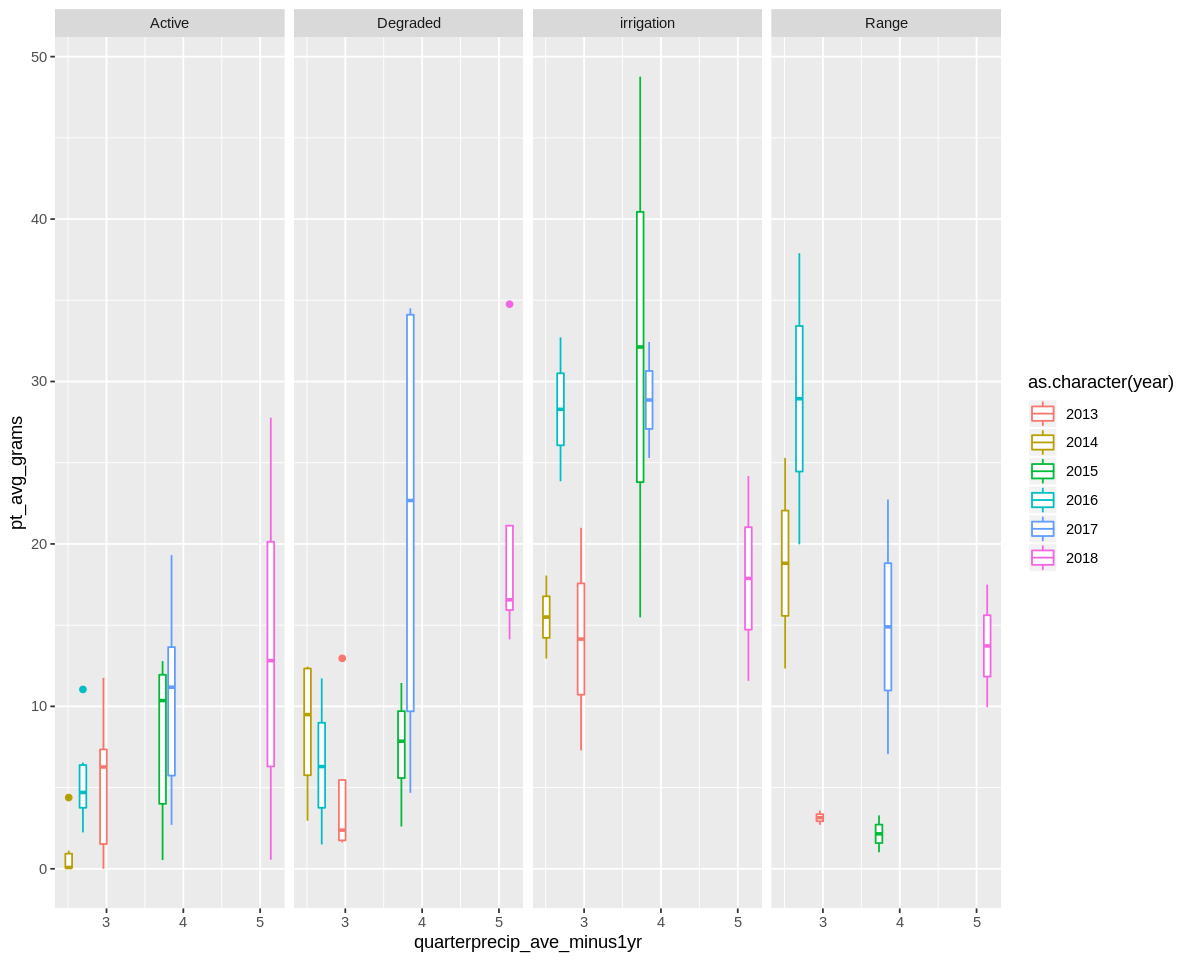

In [0]:
options(repr.plot.width=10, repr.plot.height=8)

subset(dat, !is.na(pt_avg_grams) & year > 2012) %>% 
#   filter(type == "Range") %>%
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot() +
  facet_grid(~ type)

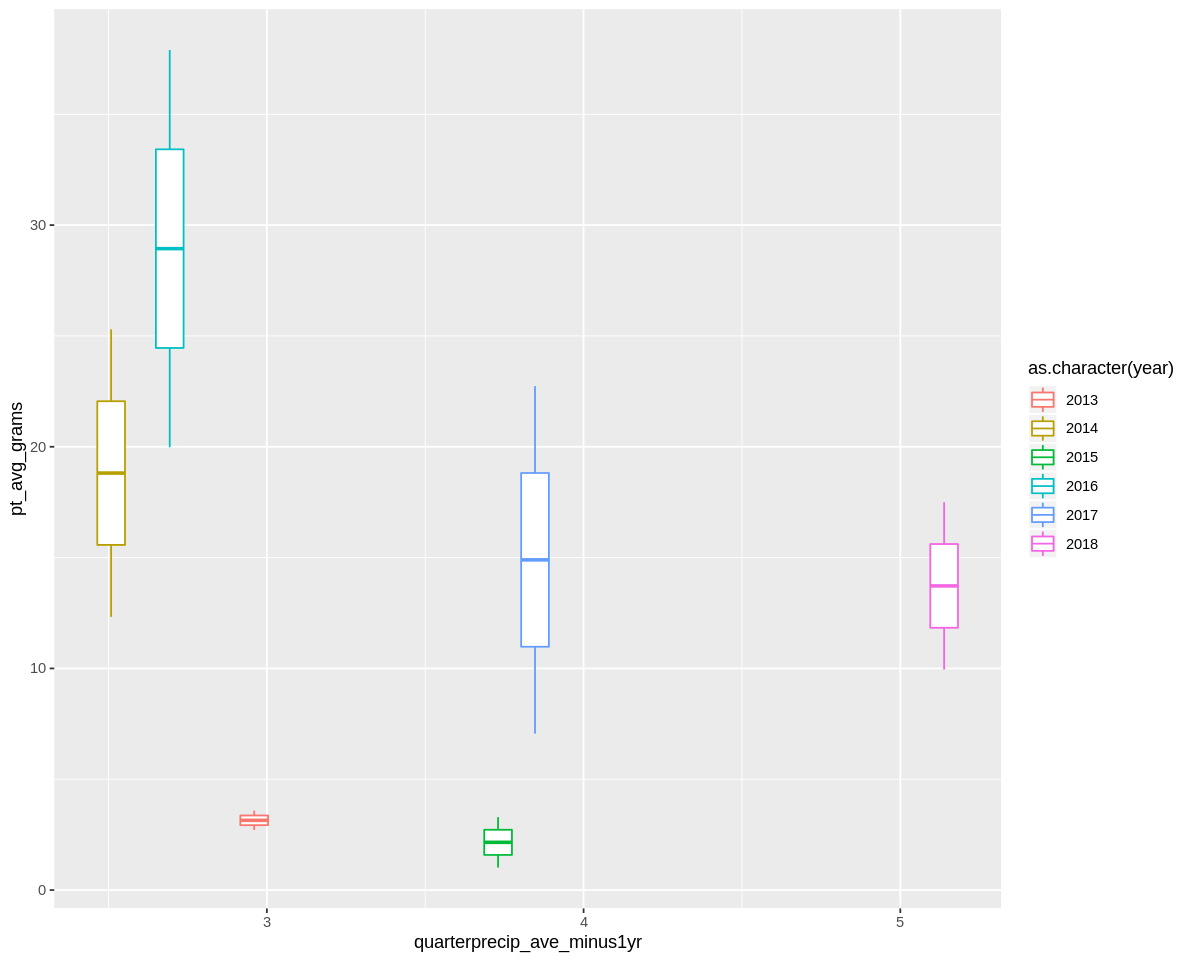

In [0]:
options(repr.plot.width=10, repr.plot.height=8)

subset(dat, !is.na(pt_avg_grams) & year > 2012) %>% 
  filter(type == "Range") %>%
  ggplot(aes(x = quarterprecip_ave_minus1yr, y = pt_avg_grams, color = as.character(year))) + 
  geom_boxplot()

In [0]:
dat

year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long,name_count
<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2010,71,Active,0.772500,fall,NA,NA,NA,46.70634,-114.0374,9
2010,86,Active,3.852500,fall,NA,NA,NA,46.70149,-114.0393,9
2010,87,Active,4.622500,fall,NA,NA,NA,46.70193,-114.0361,9
2010,107,Active,5.065000,fall,NA,NA,NA,46.69928,-114.0387,9
2010,108,Active,1.827500,fall,NA,NA,NA,46.69973,-114.0355,9
2010,121,Degraded,5.400000,fall,NA,NA,NA,46.69752,-114.0349,9
2010,189,Active,15.162500,fall,NA,NA,NA,46.68826,-114.0355,9
2010,199,Range,1.675000,fall,NA,NA,NA,46.68694,-114.0285,9
2010,225,irrigation,9.510000,fall,NA,NA,NA,46.68385,-114.0342,9


# Pairs.plot

In [0]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘mnormt’


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [0]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [0]:
head(iris[, -5])

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


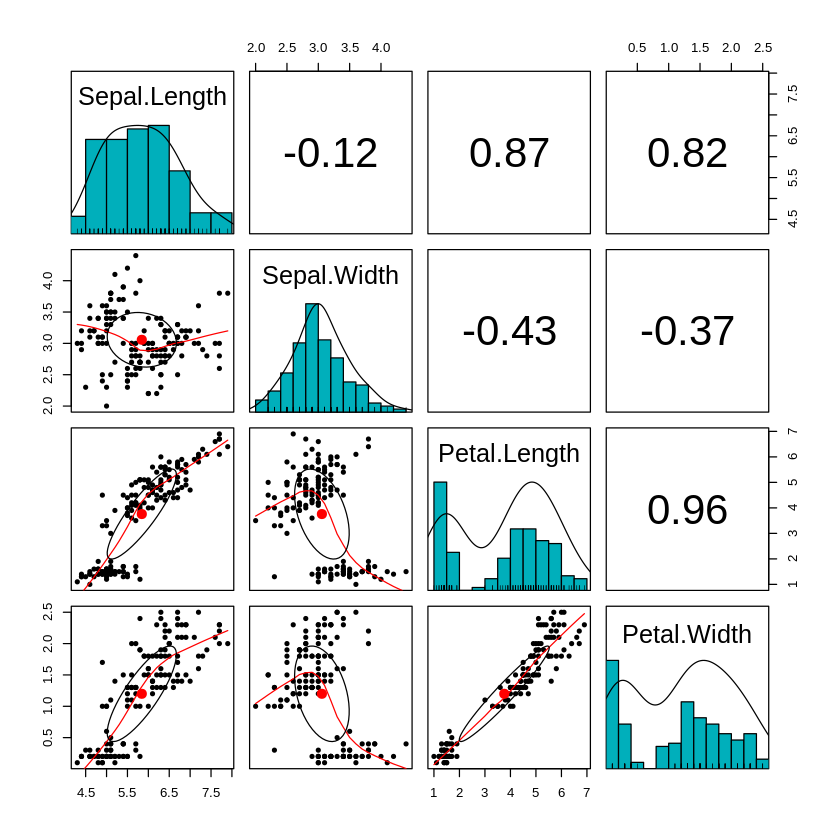

In [0]:
library(psych)
pairs.panels(iris[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

In [0]:
head(data)

year,gridpt,type,pt_avg_grams,season,quarter,quarterprecip_ave,quarterprecip_ave_minus1yr,lat,long
<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2010,2,Range,NA,fall,NA,NA,NA,46.72972,-114.0010
2010,3,Range,7.3050,fall,NA,NA,NA,46.72443,-114.0227
2010,4,Range,1.5125,fall,NA,NA,NA,46.72487,-114.0195
2010,5,Range,7.4350,fall,NA,NA,NA,46.72531,-114.0164
2010,6,Range,3.9150,fall,NA,NA,NA,46.72575,-114.0132
2010,7,Range,3.1950,fall,NA,NA,NA,46.72707,-114.0036
